<a href="https://colab.research.google.com/github/velascogringo/THYROID-DISEASE-PREDICTION-WITH-MODEL-DEPLOYMENT/blob/main/EDA_Visuals_Model_Development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##"IMPROVING HEALTHCARE OUTCOMES: UNVEILING THYROID DISEASE PATTERNS WITH MACHINE LEARNING ANALYTICS""

GRINGO R. VELASCO
JULY 21, 2023


#BACKGROUND
Thyroid disease refers to a group of medical conditions that affect the thyroid gland, a butterfly-shaped gland located in the neck, just below the Adam's apple. The thyroid secretes specific hormones and these hormones plays a crucial role in regulating various bodily functions including metabolism, temperature regulation, energy consumption and functioning of other organs and tissues in our body.

According to the 2012 Philippine Thyroid Diseases Study (PhilTiDes-1), the prevalence of thyroid function abnormalities in the Philippines is 8.53% among the adult population, and among the thyroid disorders, goiter is most common with a prevalence rate of 10.12%. Meanwhile, the 2013 National Nutrition Survey revealed that about 5.8 million Filipinos were afflicted with thyroid disorders in different clinical presentations (*https://nnc.gov.ph/regional-offices/mindanao/region-ix-zamboanga-peninsula/5330-facts-about-hyperthyroidism)*.

In the United States, roughly 20 million Americans suffer from some type pof thyroid disorder and 1 in 8 women in the US is impacted by a thyroid disorder at some point during her lifetime.

Overall, this medical condition can have a significant impact on public health and can even shorten the lifespan of individuals of any age.




#RATIONALE
The use of machine learning in predicting thyroid disease offers several significant advantages and benefits:

*   Early Detection and Prevention:
Machine learning models can analyze large datasets, including patient demographics, medical history, laboratory test results, and imaging data, to identify early signs of thyroid disease. Early detection allows for timely intervention and treatment, which can prevent the condition from progressing to a more severe stage and potentially avoid complications.

*   Enhanced Accuracy:
Machine learning algorithms can process vast amounts of data and identify patterns that may be challenging for human experts to recognize. By analyzing multiple variables and complex relationships, machine learning models can provide more accurate predictions and diagnoses, reducing the likelihood of misdiagnosis or overlooking subtle patterns indicative of thyroid disease.

*   Decision Support for Healthcare Professionals: Machine learning algorithms can act as valuable decision support tools for healthcare professionals. By providing additional insights and predictions, these models can assist doctors in making more informed and data-driven decisions, leading to better patient management.




#WORKFLOW
1.   IMPORT LIBRARIES
2.   MOUNT DRIVE AND LOAD DATA
3.   EDA
4.   CREATE DATA VISUALIZATION
5.   PREPARE DATA FOR MODELLING
6.   CREATE ML & DL MODELS, PERFORM TUNING, METRICS EVALUATION

#1. IMPORT LIBRARIES

In [ ]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import heatmap
from mpl_toolkits.mplot3d import Axes3D


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

#2. MOUNT DRIVE AND LOAD DATA

In [ ]:
#MOUNT DRIVE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = '/content/drive/MyDrive/ADVANCED_MACHINE LEARNING/CSV_EXCEL FILE/hypothyroid.csv'
df = pd.read_csv(file)

pd.set_option('display.max_columns', None) #show all columns and no truncated column

df.head()
#load the data

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.3,t,2.5,t,125,t,1.14,t,109,f,?,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.1,t,2,t,102,f,?,f,?,f,?,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,?,t,109,t,0.91,t,120,f,?,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175,f,?,f,?,f,?,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61,t,0.87,t,70,f,?,SVI,P


#3. PERFORM EDA

#DATA EXPLORATION

In [ ]:
df.shape #there are 3772 rows and 30 columnS

(3772, 30)

In [ ]:
df.info() #check data type
#all columns are showing as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on thyroxine               3772 non-null   object
 3   query on thyroxine         3772 non-null   object
 4   on antithyroid medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid surgery            3772 non-null   object
 8   I131 treatment             3772 non-null   object
 9   query hypothyroid          3772 non-null   object
 10  query hyperthyroid         3772 non-null   object
 11  lithium                    3772 non-null   object
 12  goitre                     3772 non-null   object
 13  tumor                      3772 non-null   object
 14  hypopitu

In [ ]:
df.isna().sum() #check for missing data

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
binaryClass                  0
dtype: int64

In [ ]:
df.duplicated().sum() #there are 61 duplicated values

61

In [ ]:
df.describe() #check for outlier

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
count,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772
unique,94,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,288,2,70,2,242,2,147,2,235,1,1,5,2
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,P
freq,95,2480,3308,3722,3729,3625,3719,3719,3713,3538,3535,3754,3738,3676,3771,3588,3403,369,3003,769,3541,231,3385,387,3387,385,3772,3772,2201,3481


In [ ]:
#create a for function to display the unique value for all columns
def display_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        unique_values.sort()
        print(f"Unique values in column '{column}':")
        print(unique_values)
        print()

# Call the function with your DataFrame
display_unique_values(df)


Unique values in column 'age':
['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '30' '31' '32' '33' '34' '35' '36'
 '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '455' '46' '47' '48'
 '49' '5' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '6' '60' '61'
 '62' '63' '64' '65' '66' '67' '68' '69' '7' '70' '71' '72' '73' '74' '75'
 '76' '77' '78' '79' '8' '80' '81' '82' '83' '84' '85' '86' '87' '88' '89'
 '90' '91' '92' '93' '94' '?']

Unique values in column 'sex':
['?' 'F' 'M']

Unique values in column 'on thyroxine':
['f' 't']

Unique values in column 'query on thyroxine':
['f' 't']

Unique values in column 'on antithyroid medication':
['f' 't']

Unique values in column 'sick':
['f' 't']

Unique values in column 'pregnant':
['f' 't']

Unique values in column 'thyroid surgery':
['f' 't']

Unique values in column 'I131 treatment':
['f' 't']

Unique values in column 'query hypothyroid':
['f' 't']

Unique values in column 'q

#DATA ISSUES IDENTIFIED:
1.   All columns showing as object
2.   There is "?" value showing for several columns
3.   There are 61 duplicated values
4.   The column TBG shows only unique value of "?"
5.   No missing value is showing but this should reflect missing value once "?" is replaced with blank
6.   Age has value of 455

#DATA CLEANING

1. & 2. Replace all columns that has "?" value with nan so it will reflect as missing value and convert corresponding columns into its correct data type (integer/float)

In [ ]:
df = df.replace("?", np.nan) #replace all '?' with nan

In [ ]:
def display_unique_values(df):
    for column in df.columns:
        unique_values = df[column].astype(str).unique() #this part was added in the function as there is an error encountered comparing a (str) value with a float value (float)
        unique_values.sort()
        print(f"Unique values in column '{column}':")
        print(unique_values)
        print()

display_unique_values(df) #check the unique values for all columns if '?' was replaced with nan

Unique values in column 'age':
['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '30' '31' '32' '33' '34' '35' '36'
 '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '455' '46' '47' '48'
 '49' '5' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '6' '60' '61'
 '62' '63' '64' '65' '66' '67' '68' '69' '7' '70' '71' '72' '73' '74' '75'
 '76' '77' '78' '79' '8' '80' '81' '82' '83' '84' '85' '86' '87' '88' '89'
 '90' '91' '92' '93' '94' 'nan']

Unique values in column 'sex':
['F' 'M' 'nan']

Unique values in column 'on thyroxine':
['f' 't']

Unique values in column 'query on thyroxine':
['f' 't']

Unique values in column 'on antithyroid medication':
['f' 't']

Unique values in column 'sick':
['f' 't']

Unique values in column 'pregnant':
['f' 't']

Unique values in column 'thyroid surgery':
['f' 't']

Unique values in column 'I131 treatment':
['f' 't']

Unique values in column 'query hypothyroid':
['f' 't']

Unique values in colum

In [ ]:
df.isna().sum() #check if nan is now reflecting as missing data

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

In [ ]:
df.info() #check data types (numerical data must reflect as integer / float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   object 
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

In [ ]:
df['age'] = df['age'].astype('Int64') #convert age to integer

In [ ]:
df = df.astype({'TSH': 'float','T3': 'float','TT4': 'float','T4U': 'float','FTI': 'float'}) #create a dictionary to convert these columns to float

In [ ]:
df.info() #check data if correct data type is now reflecting

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   Int64  
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

3. Drop the 61 identified duplicate values

In [ ]:
df.drop_duplicates(inplace=True) #drop duplicates

In [ ]:
df.duplicated().sum() #no duplicates showing

0

4. The column TBG shows only unique value of "?" initially but since it was replaced with nan, it is now showing as column with nan value. The column 'TBG measured' was answered all with f meaning false and no TBG measurement was taken hence we do not expect value for this column. I am replacing nan with zero.

In [ ]:
df.TBG = df.TBG.fillna(0.0) #fill all missing TBG value with 0.0

In [ ]:
df['TBG'].value_counts() #check if it was replaced

0.0    3711
Name: TBG, dtype: int64

In [ ]:
df.info() #check data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3711 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3710 non-null   Int64  
 1   sex                        3562 non-null   object 
 2   on thyroxine               3711 non-null   object 
 3   query on thyroxine         3711 non-null   object 
 4   on antithyroid medication  3711 non-null   object 
 5   sick                       3711 non-null   object 
 6   pregnant                   3711 non-null   object 
 7   thyroid surgery            3711 non-null   object 
 8   I131 treatment             3711 non-null   object 
 9   query hypothyroid          3711 non-null   object 
 10  query hyperthyroid         3711 non-null   object 
 11  lithium                    3711 non-null   object 
 12  goitre                     3711 non-null   object 
 13  tumor                      3711 non-null   objec

In [ ]:
print('Missing data:\n', df.isna().sum())
#check for final missing data

Missing data:
 age                            1
sex                          149
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          309
T3 measured                    0
T3                           709
TT4 measured                   0
TT4                          171
T4U measured                   0
T4U                          327
FTI measured                   0
FTI                          325
TBG measured                   0
TBG                            0
referral source                0
binaryClass                 

In [ ]:
df = df.rename(columns=lambda x: x.replace(' ', '_')) #replace spaces in column names with underscores for all columns

5. Implement SimpleImputer to address missing data. For age, TSH, T3, TT4, T4U and FTI, strategy of mean will be used. for sex, most frequent will be used.

In [ ]:
# Define the columns you want to impute
columns_to_impute = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

# Create the SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the selected columns
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])


In [ ]:
# Define the column to impute
column_to_impute_2 = 'sex'

# Create the SimpleImputer with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the selected column
df[column_to_impute_2] = imputer.fit_transform(df[[column_to_impute_2]])

In [ ]:
 df.isna().sum() #check for missing value

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
referral_source              0
binaryClass                  0
dtype: int64

In [ ]:
#after doing imputation, the age column is showing as float and needs to be converted to integer
df['age'] = df['age'].round()  #round the float value to nearest integer
df['age'] = df['age'].astype('Int64') #convert data to int64 data type

In [ ]:
display_unique_values(df)  #check age data

Unique values in column 'age':
['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '30' '31' '32' '33' '34' '35' '36'
 '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '455' '46' '47' '48'
 '49' '5' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '6' '60' '61'
 '62' '63' '64' '65' '66' '67' '68' '69' '7' '70' '71' '72' '73' '74' '75'
 '76' '77' '78' '79' '8' '80' '81' '82' '83' '84' '85' '86' '87' '88' '89'
 '90' '91' '92' '93' '94']

Unique values in column 'sex':
['F' 'M']

Unique values in column 'on_thyroxine':
['f' 't']

Unique values in column 'query_on_thyroxine':
['f' 't']

Unique values in column 'on_antithyroid_medication':
['f' 't']

Unique values in column 'sick':
['f' 't']

Unique values in column 'pregnant':
['f' 't']

Unique values in column 'thyroid_surgery':
['f' 't']

Unique values in column 'I131_treatment':
['f' 't']

Unique values in column 'query_hypothyroid':
['f' 't']

Unique values in column 'query_hyp

In [ ]:
df.head() #check df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.500000,t,125.0,t,1.140000,t,109.000000,f,0.0,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.000000,t,102.0,f,0.994989,f,110.480715,f,0.0,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,2.013504,t,109.0,t,0.910000,t,120.000000,f,0.0,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.900000,t,175.0,f,0.994989,f,110.480715,f,0.0,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.200000,t,61.0,t,0.870000,t,70.000000,f,0.0,SVI,P


In [ ]:
df.describe() #check for outliers
#age has 455 as max value

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3711.0,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.0
mean,51.860415,5.087820,2.013504,108.328475,0.994989,110.480715,0.0
std,20.120873,23.481473,0.744307,34.774903,0.186671,31.605819,0.0
min,1.0,0.005000,0.050000,2.000000,0.250000,2.000000,0.0
25%,36.0,0.585000,1.700000,89.000000,0.890000,94.000000,0.0
50%,54.0,1.600000,2.013504,105.000000,0.990000,110.000000,0.0
75%,67.0,3.500000,2.300000,123.000000,1.070000,122.000000,0.0
max,455.0,530.000000,10.600000,430.000000,2.320000,395.000000,0.0


There has been discussion or thread in the link below where a patient recorded a high level of TSH. In addition, by checking the data, there are TSH values greater than 400 listed above which may support that 530 is possible and would indicate a very high level of TSH. https://www.medhelp.org/posts/Thyroid-Disorders/What-is-the-highest-tsh-level/show/499096

6. Replace the value of 455 for "age" column with 45 as this is more logical. The second '5' at the end may have been a typo error.

In [ ]:
df['age'] = df['age'].replace(455, 45) #replace 455 with 45

In [ ]:
df.describe() #check again for any outlier

,age,TSH,T3,TT4,T4U,FTI,TBG
count,3711.0,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.0
mean,51.749933,5.087820,2.013504,108.328475,0.994989,110.480715,0.0
std,19.001149,23.481473,0.744307,34.774903,0.186671,31.605819,0.0
min,1.0,0.005000,0.050000,2.000000,0.250000,2.000000,0.0
25%,36.0,0.585000,1.700000,89.000000,0.890000,94.000000,0.0
50%,54.0,1.600000,2.013504,105.000000,0.990000,110.000000,0.0
75%,67.0,3.500000,2.300000,123.000000,1.070000,122.000000,0.0
max,94.0,530.000000,10.600000,430.000000,2.320000,395.000000,0.0


Age of 1 is ok at there is a condition called congenital hypothyroidism, a thyroid hormone deficiency present at birth.
https://en.wikipedia.org/wiki/Congenital_hypothyroidism

##DATA VISUALIZATION

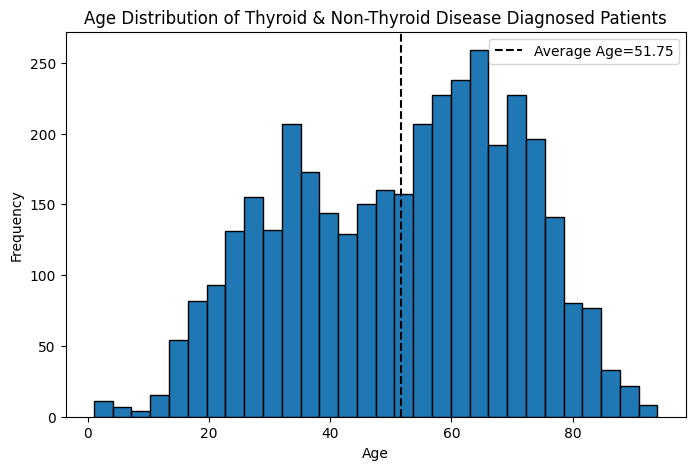

In [ ]:
plt.figure(figsize=(8,5)) 			# initialize the figure
plt.hist(df['age'], bins=30, edgecolor = 'k') 	# create a histogram with Age as the variable to visualize
plt.ylabel("Frequency") 			# add labels to the plot
plt.xlabel("Age")
plt.title("Age Distribution of Thyroid & Non-Thyroid Disease Diagnosed Patients")	# add title to the plot
plt.axvline(df['age'].mean(), color="k", ls="--", label=f"Average Age={round(df['age'].mean(),2)}")
plt.legend();					# create a legend in the graph



The histogram shows the age distribution of all thyroid disease patients. Average age of patient is 52 years old as indicated by the broken line in the chart. Chart also shows that the highest distribution of patient is within the 60-68 age range with the lowest on the age of 1.

<ipython-input-200-fd031b933fc8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


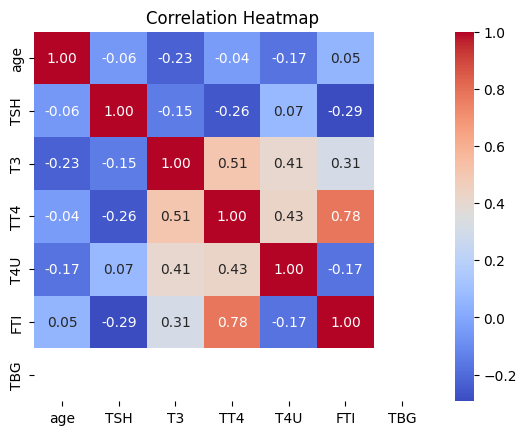

In [ ]:
correlation_matrix = df.corr()
# Create the heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")

# Set the title for the heatmap
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

The heatmap displays the correlation matrix of the numerics features in the dataset. Slightly high correlation noted for TT4 and FTI (.78)and medium correlation between TT4 and T3 (.51).
It's important to note that correlation does not imply causation. Even if two variables have a high correlation, it does not necessarily mean that one causes the other. Correlation measures only the strength and direction of the linear relationship between variables.

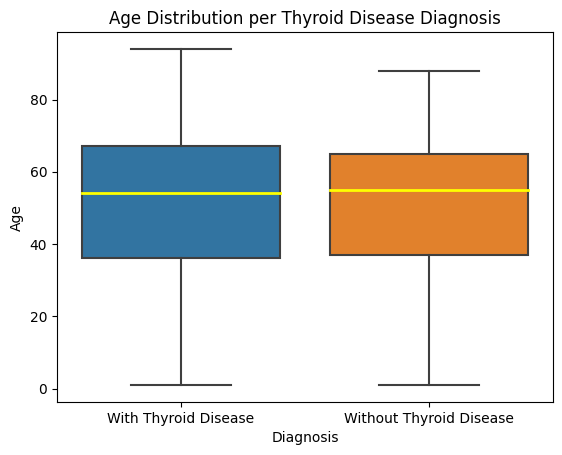

In [ ]:
# Map 'P' to 'With Thyroid Disease' and 'N' to 'Without Thyroid Disease' for the ticklabels
label_mapping = {'P': 'With Thyroid Disease', 'N': 'Without Thyroid Disease'}

# Create a box plot for the 'age' distribution based on 'binaryClass'
ax = sns.boxplot(data=df, x='binaryClass', y='age',
                 showfliers=False,
                 medianprops=dict(linestyle='-', linewidth=2, color='Yellow'))

# Update the x-axis tick labels using the label_mapping dictionary
ax.set_xticklabels([label_mapping[label.get_text()] for label in ax.get_xticklabels()])

# Set the title for the plot
plt.title('Age Distribution per Thyroid Disease Diagnosis')
# Set the x and y-axis labels
ax.set_xlabel('Diagnosis')
ax.set_ylabel('Age')


# Show the plot
plt.show()

The boxplot above shows the age distribution of thyroid disease patients. Data shows that subjects with thyroid disease represented by blue boxplot has a  median age of around 54 and age primarily distributed between 36-64 years old. Similar to subjects with thyroid disease, the non-thryroid disease subjects reflected age of around 55 with age distributed between 38-62 years old.

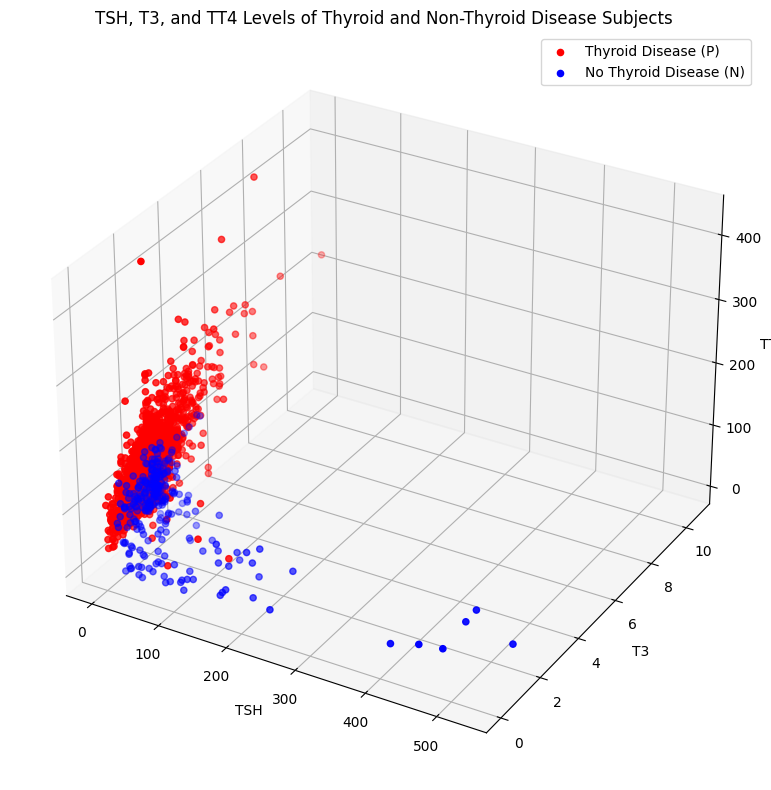

In [ ]:
#create 3d scatter plot using primary hormones use in diagnosing thyroid disease.
#Blood tests that measure the hormones TT-4 and T-3 and thyroid-stimulating hormone (TSH) can confirm a diagnosis of thyroid disease.
#https://www.mayoclinic.org/diseases-conditions/hyperthyroidism/diagnosis-treatment/drc-20373665#:~:text=Diagnosis%201%20Medical%20history%20and%20physical%20exam.%20During,TSH%20is%20common%20in%20people%20with%20hyperthyroidism.%20

# Convert 'TSH', 'T3', and 'TT4' columns to float
df['TSH'] = df['TSH'].astype(float)
df['T3'] = df['T3'].astype(float)
df['TT4'] = df['TT4'].astype(float)

# Separate data with and without thyroid disease based on binary class
thyroid_disease_data = df[df['binaryClass'] == 'P']
no_thyroid_disease_data = df[df['binaryClass'] == 'N']

# Create the 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data with thyroid disease (Positive class) in red
ax.scatter(thyroid_disease_data['TSH'], thyroid_disease_data['T3'], thyroid_disease_data['TT4'], c='r', marker='o', label='Thyroid Disease (P)')

# Plot data without thyroid disease (Negative class) in blue
ax.scatter(no_thyroid_disease_data['TSH'], no_thyroid_disease_data['T3'], no_thyroid_disease_data['TT4'], c='b', marker='o', label='No Thyroid Disease (N)')

# Set labels for the axes
ax.set_xlabel('TSH')
ax.set_ylabel('T3')
ax.set_zlabel('TT4')

# Set the plot title
ax.set_title('TSH, T3, and TT4 Levels of Thyroid and Non-Thyroid Disease Subjects')
plt.tight_layout()

# Add a legend
ax.legend()

# Show the plot
plt.show()

The scatterplot shows the distribution of TSH, T3 & TT4 hormones in the dataset. It is remarkable to note that Thryoid disease subjects concentrated on the area where TSH is low, high T3 and approximately half of thyroid disease subjects with high TT4. On the other hand, non-thyroid disease subjects are on the lower half TT4 and T3 level. It also notable than non-thyroid has higher TSH compare to thyroid diagnosed subjects.

##5. PREPARE DATA FOR MODELLING

In [ ]:
#check df
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,binaryClass
0,41,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.500000,t,125.0,t,1.140000,t,109.000000,f,0.0,SVHC,P
1,23,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.000000,t,102.0,f,0.994989,f,110.480715,f,0.0,other,P
2,46,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,2.013504,t,109.0,t,0.910000,t,120.000000,f,0.0,other,P
3,70,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.900000,t,175.0,f,0.994989,f,110.480715,f,0.0,other,P
4,70,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.200000,t,61.0,t,0.870000,t,70.000000,f,0.0,SVI,P


In [ ]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column contains object (categorical) data
        df[col] = label_encoder.fit_transform(df[col])  # Apply label encoding to the column

# Now, all object (categorical) columns in the DataFrame have been label encoded.

In [ ]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,binaryClass
0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.30,1,2.500000,1,125.0,1,1.140000,1,109.000000,0,0.0,1,1
1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.10,1,2.000000,1,102.0,0,0.994989,0,110.480715,0,0.0,4,1
2,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.98,0,2.013504,1,109.0,1,0.910000,1,120.000000,0,0.0,4,1
3,70,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.16,1,1.900000,1,175.0,0,0.994989,0,110.480715,0,0.0,4,1
4,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.72,1,1.200000,1,61.0,1,0.870000,1,70.000000,0,0.0,3,1


In [ ]:
display_unique_values(df)  #check if all columns have been labelled and encoded

Unique values in column 'age':
['1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21' '22'
 '23' '24' '25' '26' '27' '28' '29' '30' '31' '32' '33' '34' '35' '36'
 '37' '38' '39' '4' '40' '41' '42' '43' '44' '45' '46' '47' '48' '49' '5'
 '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '6' '60' '61' '62' '63'
 '64' '65' '66' '67' '68' '69' '7' '70' '71' '72' '73' '74' '75' '76' '77'
 '78' '79' '8' '80' '81' '82' '83' '84' '85' '86' '87' '88' '89' '90' '91'
 '92' '93' '94']

Unique values in column 'sex':
['0' '1']

Unique values in column 'on_thyroxine':
['0' '1']

Unique values in column 'query_on_thyroxine':
['0' '1']

Unique values in column 'on_antithyroid_medication':
['0' '1']

Unique values in column 'sick':
['0' '1']

Unique values in column 'pregnant':
['0' '1']

Unique values in column 'thyroid_surgery':
['0' '1']

Unique values in column 'I131_treatment':
['0' '1']

Unique values in column 'query_hypothyroid':
['0' '1']

Unique values in column 'query_hyperthyr

In [ ]:
df.info() #check the data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3711 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3711 non-null   Int64  
 1   sex                        3711 non-null   int64  
 2   on_thyroxine               3711 non-null   int64  
 3   query_on_thyroxine         3711 non-null   int64  
 4   on_antithyroid_medication  3711 non-null   int64  
 5   sick                       3711 non-null   int64  
 6   pregnant                   3711 non-null   int64  
 7   thyroid_surgery            3711 non-null   int64  
 8   I131_treatment             3711 non-null   int64  
 9   query_hypothyroid          3711 non-null   int64  
 10  query_hyperthyroid         3711 non-null   int64  
 11  lithium                    3711 non-null   int64  
 12  goitre                     3711 non-null   int64  
 13  tumor                      3711 non-null   int64

In [ ]:
df['binaryClass'].value_counts(normalize=True) #check dataset if balance

1    0.921584
0    0.078416
Name: binaryClass, dtype: float64

##The dataset is NOT balance. There are only 7.8% data for non-diagnosis of thyroid and 92.2% for thyroid diagnosed.

##In order to addressed the imbalance data, I willuse the SMOTE (Synthetic Minority Over-sampling Technique) algorithm for oversampling the minority class and the RandomUnderSampler for undersampling the majority class. These techniques create synthetic samples for the minority class and randomly remove samples from the majority class to balance the dataset.

In [ ]:
#separate the features (X) and the target (y) column
X = df.drop('binaryClass', axis=1)
y = df['binaryClass']


In [ ]:
y.value_counts() #check target balance

1    3420
0     291
Name: binaryClass, dtype: int64

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features using the StandardScaler
X_scaled= scaler.fit_transform(X)

# Create a new DataFrame with scaled features
df_scaled= pd.DataFrame(X_scaled, columns=X.columns)

# Add the target variable 'binaryClass' back to the DataFrame
df_scaled['binaryClass'] = y

# Now, the 'df_scaled' DataFrame contains the scaled features along with the target variable.
df_scaled.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,binaryClass
0,-0.565828,-0.665045,-0.378023,-0.116865,-0.106992,-0.203091,-0.120369,-0.120369,-0.127104,-0.259421,-0.259421,-0.069815,-0.09616,-0.16296,-0.016418,-0.228405,0.301378,-0.161333,0.485979,0.653711,0.219784,0.479477,0.310856,7.769273e-01,0.309812,-0.046856,0.0,0.0,-2.067206,1.0
1,-1.513267,-0.665045,-0.378023,-0.116865,-0.106992,-0.203091,-0.120369,-0.120369,-0.127104,-0.259421,-0.259421,-0.069815,-0.09616,-0.16296,-0.016418,-0.228405,0.301378,-0.042074,0.485979,-0.018146,0.219784,-0.182008,-3.216928,-5.948271e-16,-3.227764,0.000000,0.0,0.0,0.667697,1.0
2,-0.302651,1.503657,-0.378023,-0.116865,-0.106992,-0.203091,-0.120369,-0.120369,-0.127104,-0.259421,-0.259421,-0.069815,-0.09616,-0.16296,-0.016418,-0.228405,0.301378,-0.174962,-2.057701,0.000000,0.219784,0.019313,0.310856,-4.553497e-01,0.309812,0.301228,0.0,0.0,0.667697,1.0
3,0.960601,-0.665045,2.645344,-0.116865,-0.106992,-0.203091,-0.120369,-0.120369,-0.127104,-0.259421,-0.259421,-0.069815,-0.09616,-0.16296,-0.016418,-0.228405,0.301378,-0.209888,0.485979,-0.152517,0.219784,1.917489,-3.216928,-5.948271e-16,-3.227764,0.000000,0.0,0.0,0.667697,1.0
4,0.960601,-0.665045,-0.378023,-0.116865,-0.106992,-0.203091,-0.120369,-0.120369,-0.127104,-0.259421,-0.259421,-0.069815,-0.09616,-0.16296,-0.016418,-0.228405,0.301378,-0.186036,0.485979,-1.093117,0.219784,-1.361179,0.310856,-6.696588e-01,0.309812,-1.280972,0.0,0.0,-0.243938,1.0


In [ ]:
# Separate the features (X) and the target (y) column
X = df_scaled.drop('binaryClass', axis=1)
y = df_scaled['binaryClass']

# Impute missing values in the target variable 'y' with the most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')
y = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()

# Initialize oversampler and undersampler
oversampler = SMOTE(sampling_strategy='auto')
undersampler = RandomUnderSampler(sampling_strategy='auto')

# Apply both oversampling and undersampling to balance the dataset
X_resampled, y_resampled = oversampler.fit_resample(X, y)
X_balanced, y_balanced = undersampler.fit_resample(X_resampled, y_resampled)

# Create a new balanced DataFrame
df_balanced = pd.DataFrame(X_balanced, columns=X.columns)
df_balanced['binaryClass'] = y_balanced

# Now, the 'df_balanced' DataFrame contains a balanced dataset

In [ ]:
df_balanced['binaryClass'].value_counts() #dataset is now showing as balanced

0.0    3428
1.0    3428
Name: binaryClass, dtype: int64

In [ ]:
df_balanced.head() #check df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,binaryClass
0,0.697424,-0.665045,-0.378023,-0.116865,-0.106992,-0.203091,-0.120369,-0.120369,-0.127104,3.854734,-0.259421,-0.069815,-0.09616,-0.16296,-0.016418,-0.228405,0.301378,0.294407,-2.057701,0.000000,0.219784,-0.268289,0.310856,0.776927,0.309812,-0.743024,0.0,0.0,0.667697,0.0
1,-0.407921,1.503657,-0.378023,-0.116865,-0.106992,-0.203091,-0.120369,-0.120369,-0.127104,-0.259421,-0.259421,-0.069815,-0.09616,-0.16296,-0.016418,-0.228405,0.301378,1.699960,0.485979,-0.824374,0.219784,-1.993904,0.310856,0.884082,0.309812,-2.451800,0.0,0.0,-0.243938,0.0
2,0.697424,1.503657,-0.378023,-0.116865,-0.106992,-0.203091,-0.120369,-0.120369,-0.127104,-0.259421,-0.259421,-0.069815,-0.09616,-0.16296,-0.016418,-0.228405,0.301378,0.413666,0.485979,-0.690003,0.219784,-1.361179,0.310856,-0.776813,0.309812,-1.217684,0.0,0.0,-0.243938,0.0
3,-1.302725,-0.665045,-0.378023,-0.116865,-0.106992,-0.203091,-0.120369,-0.120369,-0.127104,-0.259421,-0.259421,-0.069815,-0.09616,-0.16296,-0.016418,-0.228405,0.301378,0.422185,0.485979,-0.555631,0.219784,-0.757213,0.310856,-0.937545,0.309812,-0.331652,0.0,0.0,-0.243938,0.0
4,0.118433,-0.665045,-0.378023,-0.116865,-0.106992,-0.203091,-0.120369,-0.120369,-0.127104,-0.259421,-0.259421,-0.069815,-0.09616,-0.16296,-0.016418,-0.228405,0.301378,0.592555,0.485979,0.250597,0.219784,-0.728453,0.310856,0.187577,0.309812,-0.932888,0.0,0.0,-2.067206,0.0


In [ ]:
df_balanced.info() #check info/types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6856 entries, 0 to 6855
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        6856 non-null   float64
 1   sex                        6856 non-null   float64
 2   on_thyroxine               6856 non-null   float64
 3   query_on_thyroxine         6856 non-null   float64
 4   on_antithyroid_medication  6856 non-null   float64
 5   sick                       6856 non-null   float64
 6   pregnant                   6856 non-null   float64
 7   thyroid_surgery            6856 non-null   float64
 8   I131_treatment             6856 non-null   float64
 9   query_hypothyroid          6856 non-null   float64
 10  query_hyperthyroid         6856 non-null   float64
 11  lithium                    6856 non-null   float64
 12  goitre                     6856 non-null   float64
 13  tumor                      6856 non-null   float

#IDENTIFY TARGET AND FEATURES and PERFORM TRAIN TEST SPLIT

In [ ]:
X = df_balanced.drop(columns = 'binaryClass') #assign X and y
y = df_balanced['binaryClass']

In [ ]:
X_train, X_test,  y_train, y_test = train_test_split(X,y, random_state=42) #split the data

##6.   CREATE ML & DL MODELS, PERFORM TUNING & METRICS EVALUATION

FIRST ML MODEL - Decision Tree Classifier

In [ ]:
#INSTANTIATE THE MODEL
dec_tree = DecisionTreeClassifier()

In [ ]:
#FIT THE MODEL
%%time
dec_tree.fit(X_train, y_train)

CPU times: user 62 ms, sys: 0 ns, total: 62 ms
Wall time: 69.2 ms


DecisionTreeClassifier()

In [ ]:
# SAVE PREDICTIONS FOR BOTH THE TRAINING AND TESTING DATA
dt_train_preds = dec_tree.predict(X_train)
dt_test_preds = dec_tree.predict(X_test)

In [ ]:
dt_train_score = dec_tree.score(X_train, y_train)
dt_test_score = dec_tree.score(X_test, y_test)
print('Training Accuracy:',dt_train_score)
print('Testing Accuracy:',dt_test_score) #print scores

Training Accuracy: 1.0
Testing Accuracy: 0.8191365227537923


In [ ]:
# classification report- training set
dt_train_report = classification_report(y_train, dt_train_preds)
print('Training Set Classification Report')
print(dt_train_report)

Training Set Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2559
         1.0       1.00      1.00      1.00      2583

    accuracy                           1.00      5142
   macro avg       1.00      1.00      1.00      5142
weighted avg       1.00      1.00      1.00      5142



In [ ]:
# classification report- testing set
dt_test_report = classification_report(y_test, dt_test_preds)
print('Testing Set Classification Report')
print(dt_test_report)

Testing Set Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       869
         1.0       0.82      0.82      0.82       845

    accuracy                           0.82      1714
   macro avg       0.82      0.82      0.82      1714
weighted avg       0.82      0.82      0.82      1714



The default Decision Tree Classifier model obtained a perfect accuracy score of 100% for training data while 82% was the score for the testing data thay may indicate overfitting.

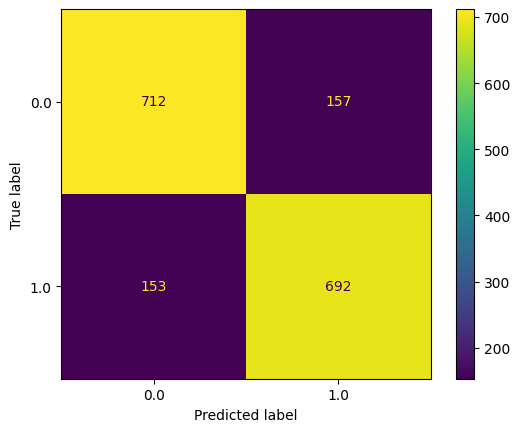

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, dt_test_preds,
                                        display_labels = None); #display the confusion matrix

The confusion matrix above shows the actual prediction scores of the Decision Tree Classifier model. This model scored 712 true negative and  692 true positive over 1714 total that equates to 82% accuracy. Model also scored 157 false negative and 153 false positive.

#Perform Tuning - Decision Tree Classifier

In [ ]:
dec_tree.get_params() #check parameters of the model

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
dec_tree.get_depth() #check the default depth

38

In [ ]:
dt_params= {'max_depth': range(1,20), 'min_samples_split': range(1,10), 'min_samples_leaf': range(1,10)} #specify the parameters to be used for tuning

In [ ]:
dt_grid = GridSearchCV(dec_tree, dt_params, cv=3) #instantiate the grid

In [ ]:
%%time
# ^ cell magic to print the time it takes for the cell to run.
dt_grid.fit(X_train, y_train) #fit to training data. It took 2mins and 1sec to fit to the training data

CPU times: user 2min 1s, sys: 177 ms, total: 2min 1s
Wall time: 2min 37s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
513 fits failed out of a total of 4617.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
513 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _val

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [ ]:
# Check the optimal combinations of hyperparameters
dt_grid.best_params_

{'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [ ]:
# Get the best model
best_dt = dt_grid.best_estimator_
best_dt

DecisionTreeClassifier(max_depth=19, min_samples_split=3)

In [ ]:
best_dt.fit(X_train, y_train) #fit the best model to data

DecisionTreeClassifier(max_depth=19, min_samples_split=3)

In [ ]:
# SAVE PREDICTIONS FOR BOTH THE TRAINING AND TESTING DATA
best_dt_train_preds = best_dt.predict(X_train)
best_dt_test_preds = best_dt.predict(X_test)

In [ ]:
#Print the scores
best_dt_train_score = best_dt.score(X_train,y_train)
best_dt_test_score = best_dt.score(X_test, y_test)
print(best_dt_train_score)
print(best_dt_test_score)

0.9716063788409179
0.8203033838973163


The tuned Decision Tree model scored 97% for training data and 82% for testing data.

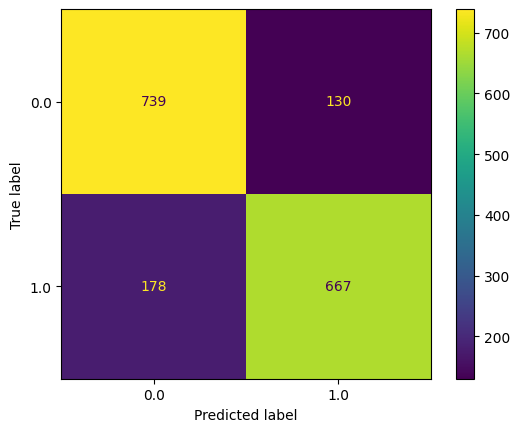

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, best_dt_test_preds,
                                        display_labels = None); #display the confusion matrix

The confusion matrix above shows the actual prediction scores of the Tuned Decision Tree Classifier model. This model scored 739 true negative and  667 true positive over 1714 total that equates to 82% accuracy. Model also scored 130 false negative and 178 false positive.

#SECOND MODEL - Random Forest Classifier

In [ ]:
#INSTANTIATE THE MODEL
rf = RandomForestClassifier()

In [ ]:
#FIT THE MODEL
%%time
rf.fit(X_train, y_train)

CPU times: user 1.44 s, sys: 4.9 ms, total: 1.44 s
Wall time: 2.76 s


RandomForestClassifier()

In [ ]:
# SAVE PREDICTIONS FOR BOTH THE TRAINING AND TESTING DATA
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

In [ ]:
#show the scores
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print('Training Accuracy:', rf_train_score)
print('Testing Accuracy:', rf_test_score)

Training Accuracy: 1.0
Testing Accuracy: 0.9194865810968494


In [ ]:
# classifcation report for training data
rf_train_report = classification_report(y_train, rf_train_preds)
print('Training Set Classification Report')
print(rf_train_report)

Training Set Classification Report
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2559
         1.0       1.00      1.00      1.00      2583

    accuracy                           1.00      5142
   macro avg       1.00      1.00      1.00      5142
weighted avg       1.00      1.00      1.00      5142



In [ ]:
# classifcation report for testing data
rf_test_report = classification_report(y_test, rf_test_preds)
print('Testing Set Classification Report')
print(rf_test_report)

Testing Set Classification Report
              precision    recall  f1-score   support

         0.0       0.92      0.92      0.92       869
         1.0       0.92      0.92      0.92       845

    accuracy                           0.92      1714
   macro avg       0.92      0.92      0.92      1714
weighted avg       0.92      0.92      0.92      1714



The default Random Forest Classifier model obtained a perfect accuracy score of 100% for training data with  92%  score for the testing data.

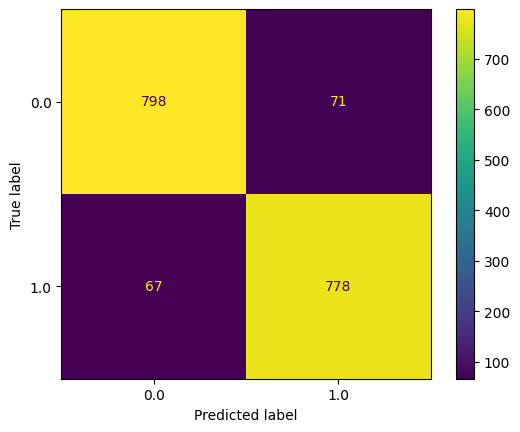

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_test_preds,
                                        display_labels = None); #display the confusion matrix

The confusion matrix above shows the actual prediction scores of the Random Forest Classifier model. This model scored 798 true negative and  778 true positive over 1714 total that equates to 92% accuracy. Model also scored 71 false negative and 67 false positive.

#Perform Tuning - Random Forest Classifier

In [ ]:
rf.get_params() #check parameters of the model

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf_params= {'max_depth': range(1,20), 'min_samples_leaf': range(1,3)}  #specify the parameters to be used for tuning

In [ ]:
rf_grid = GridSearchCV(rf, rf_params, cv=3) #instantiate the grid

In [ ]:
%%time
# ^ cell magic to print the time it takes for the cell to run.
rf_grid.fit(X_train, y_train) #fit to training data. It took 1 minutes and 2 seconds to run.

CPU times: user 1min 1s, sys: 196 ms, total: 1min 2s
Wall time: 1min 2s


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 3)})

In [ ]:
# Check the optimal combinations of hyperparameters
rf_grid.best_params_

{'max_depth': 19, 'min_samples_leaf': 1}

In [ ]:
# Get the best model
best_rf = rf_grid.best_estimator_
best_rf

RandomForestClassifier(max_depth=19)

In [ ]:
best_rf.fit(X_train, y_train) #fit the best model

RandomForestClassifier(max_depth=19)

In [ ]:
# SAVE PREDICTIONS FOR BOTH THE TRAINING AND TESTING DATA
best_rf_train_preds = best_rf.predict(X_train)
best_rf_test_preds = best_rf.predict(X_test)

In [ ]:
best_rf_train_score = best_rf.score(X_train,y_train)
best_rf_test_score = best_rf.score(X_test, y_test)
print(best_rf_train_score)
print(best_rf_test_score)
#print the scores

0.9893037728510308
0.912485414235706


The (TUNED) Random Forest Classifier model obtained 99% accuracy score  for training data with  91%  score for the testing data. Training and testing scores are almost similar to the default model.

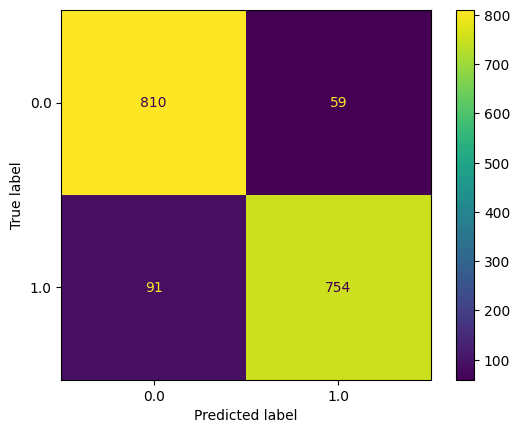

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, best_rf_test_preds,
                                        display_labels = None); #display the confusion matrix

The confusion matrix above shows  actual prediction scores of the Random Forest Classifier (TUNED) model. This model scored 810 true negative and  754 true positive over 1714 total that equates to 91% accuracy. Model also scored 59 false negative and 91 false positive.

##KNN MODELS (WITH AND WITHOUT PCA)

#With PCA

In [ ]:
knn = KNeighborsClassifier() #instantiate the model
pca = PCA (n_components = .95) #instantiate the PCA variance

In [ ]:
pca_model = make_pipeline(pca, knn) #make a pipeline


UsageError: Line magic function `%%time` not found.


In [ ]:
%%time
pca_model.fit(X_train, y_train) #fit the model

CPU times: user 17 ms, sys: 9.91 ms, total: 26.9 ms
Wall time: 24 ms


Pipeline(steps=[('pca', PCA(n_components=0.95)),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
# SAVE PREDICTIONS FOR BOTH THE TRAINING AND TESTING DATA
pca_model_train_preds= pca_model.predict(X_train)
pca_model_test_preds= pca_model.predict(X_test)

In [ ]:
#show the scores
pca_train_score = pca_model.score(X_train, y_train)
pca_test_score = pca_model.score(X_test, y_test)
print('Training accuracy:', pca_model.score(X_train, y_train))
print('Testing accuracy:', pca_model.score(X_test, y_test))

Training accuracy: 0.8802022559315441
Testing accuracy: 0.8249708284714119


In [ ]:
# classifcation report for training data
pca_model_train_report = classification_report(y_train, pca_model_train_preds)
print('Training Set Classification Report')
print(pca_model_train_report)

Training Set Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      2559
         1.0       0.97      0.79      0.87      2583

    accuracy                           0.88      5142
   macro avg       0.89      0.88      0.88      5142
weighted avg       0.89      0.88      0.88      5142



In [ ]:
# classifcation report for training data
pca_model_test_report = classification_report(y_test, pca_model_test_preds)
print('Testing Set Classification Report')
print(pca_model_test_report)

Testing Set Classification Report
              precision    recall  f1-score   support

         0.0       0.76      0.95      0.85       869
         1.0       0.93      0.70      0.80       845

    accuracy                           0.82      1714
   macro avg       0.85      0.82      0.82      1714
weighted avg       0.85      0.82      0.82      1714



The KNN model with PCA applied obtained 88%% accuracy score  for training data with  82%  score for the testing data.

PCA KNN matrix: 



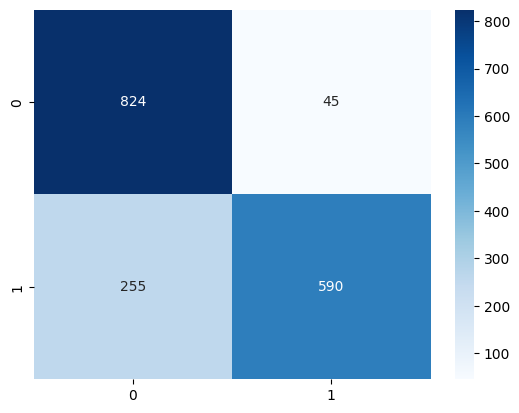

In [ ]:
pca_confmat = confusion_matrix(y_test, pca_model_test_preds)
print('PCA KNN matrix: \n')
sns.heatmap(pca_confmat, annot=True, fmt = 'g', cmap='Blues');

The confusion matrix above shows  actual prediction scores of the KNN model with PCA applied. This model scored 824 true negative and  590 true positive over 1714 total that equates to 82% accuracy. Model also scored 45 false negative and 255 false positive.

#Without PCA

In [ ]:
no_pca_model = make_pipeline(knn)


In [ ]:
%%time
no_pca_model.fit(X_train, y_train)

CPU times: user 8.43 ms, sys: 0 ns, total: 8.43 ms
Wall time: 26.7 ms


Pipeline(steps=[('kneighborsclassifier', KNeighborsClassifier())])

In [ ]:
# SAVE PREDICTIONS FOR BOTH THE TRAINING AND TESTING DATA
no_pca_model_train_preds= no_pca_model.predict(X_train)
no_pca_model_test_preds= no_pca_model.predict(X_test)

In [ ]:
#show the scores
no_pca_train_score = no_pca_model.score(X_train, y_train)
no_pca_test_score = no_pca_model.score(X_test, y_test)
print('Training accuracy:',no_pca_model.score(X_train, y_train))
print('Testing accuracy:', no_pca_model.score(X_test, y_test))

Training accuracy: 0.8868144690781797
Testing accuracy: 0.8302217036172695


In [ ]:
# classifcation report for training data
no_pca_model_train_report = classification_report(y_train, no_pca_model_train_preds)
print('Training Set Classification Report')
print(no_pca_model_train_report)

Training Set Classification Report
              precision    recall  f1-score   support

         0.0       0.83      0.98      0.90      2559
         1.0       0.97      0.80      0.88      2583

    accuracy                           0.89      5142
   macro avg       0.90      0.89      0.89      5142
weighted avg       0.90      0.89      0.89      5142



In [ ]:
# classifcation report for training data
no_pca_model_test_report = classification_report(y_test, no_pca_model_test_preds)
print('Testing Set Classification Report')
print(no_pca_model_test_report)

Testing Set Classification Report
              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85       869
         1.0       0.94      0.70      0.80       845

    accuracy                           0.83      1714
   macro avg       0.85      0.83      0.83      1714
weighted avg       0.85      0.83      0.83      1714



The KNN model without PCA applied obtained 89%% accuracy score  for training data with  83%  score for the testing data.

NO PCA KNN matrix: 



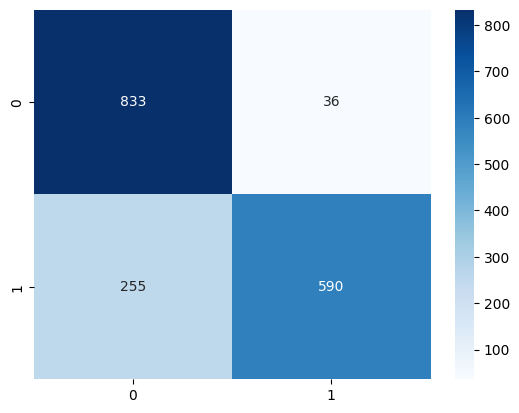

In [ ]:
pca_confmat = confusion_matrix(y_test, no_pca_model_test_preds)
print('NO PCA KNN matrix: \n')
sns.heatmap(pca_confmat, annot=True, fmt = 'g', cmap='Blues');

The confusion matrix above shows  actual prediction scores of the KNN model without PCA applied. This model scored 833 true negative and  590 true positive over 1714 that equates to 83% accuracy. Model also scored 36 false negative and 255 false positive.

##MAKE A NEURAL NETWORK MODEL

In [ ]:
'''
Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0,
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units,
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0,
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers

def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]

    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025

    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color

        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)

        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)

            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')

    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left],
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space],
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()


#Define network structure


In [ ]:
# Save the number of features we have as our input shape
input_shape = X_train.shape[1]
input_shape

29

In [ ]:
# Sequential model
model = Sequential()

In [ ]:
# First hidden layer
model.add(Dense(29, # number of neurons
                input_dim = input_shape, # shape of  input features (number of columns)
                activation = 'relu'))
# Second hidden layer
model.add(Dense(15, # Hnumber of neurons in second hidden layer
                activation = 'relu')) #  activation function
                # Output layer
model.add(Dense(1, activation = 'sigmoid'))

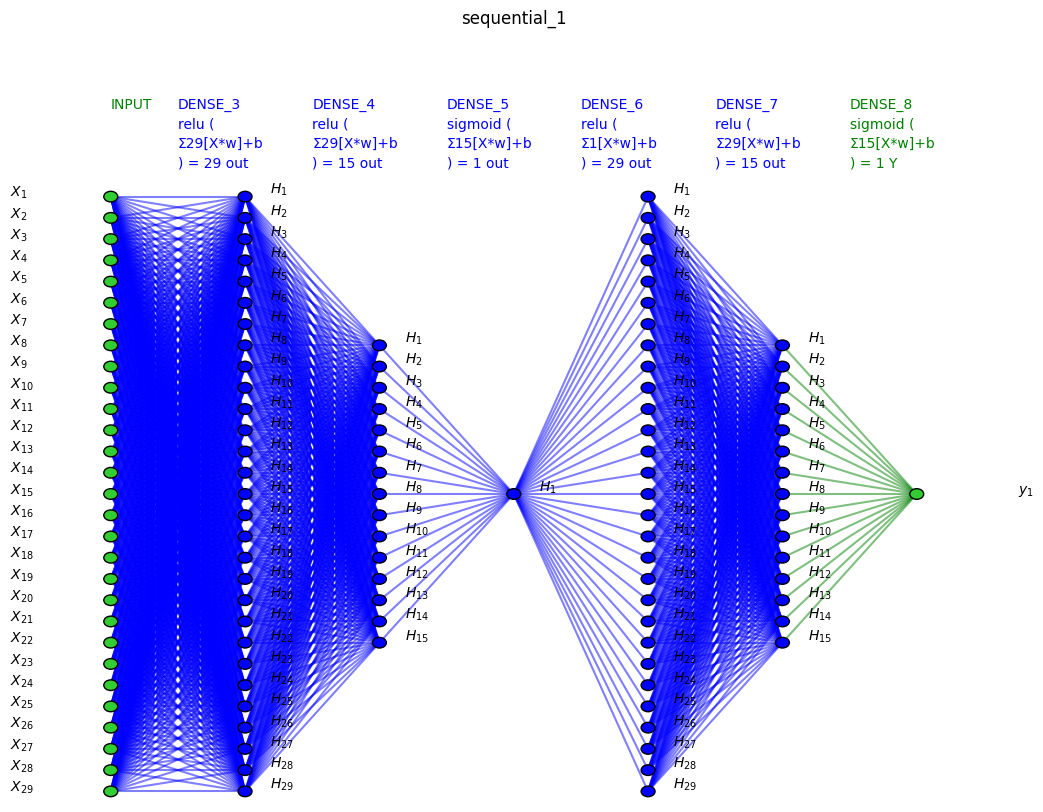

In [ ]:
visualize_nn(model, description=True, figsize=(13,10))

#Compile the model

In [ ]:
#Compile
model.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy'])

#Fit the model

In [ ]:
%%time
history = model.fit(X_train, y_train, #Fit the  model
                    validation_data = (X_test, y_test), #took 17.1secs
                    epochs=30)

Epoch 1/30
161/161 [==============================] - 1s 8ms/step - loss: 0.4026 - accuracy: 0.8403 - val_loss: 0.4814 - val_accuracy: 0.7964
Epoch 2/30
161/161 [==============================] - 1s 5ms/step - loss: 0.3976 - accuracy: 0.8384 - val_loss: 0.4732 - val_accuracy: 0.8069
Epoch 3/30
161/161 [==============================] - 0s 3ms/step - loss: 0.3970 - accuracy: 0.8401 - val_loss: 0.4838 - val_accuracy: 0.8104
Epoch 4/30
161/161 [==============================] - 1s 3ms/step - loss: 0.3900 - accuracy: 0.8471 - val_loss: 0.4836 - val_accuracy: 0.8051
Epoch 5/30
161/161 [==============================] - 0s 3ms/step - loss: 0.3924 - accuracy: 0.8425 - val_loss: 0.4878 - val_accuracy: 0.8040
Epoch 6/30
161/161 [==============================] - 1s 3ms/step - loss: 0.3868 - accuracy: 0.8485 - val_loss: 0.4806 - val_accuracy: 0.7993
Epoch 7/30
161/161 [==============================] - 0s 3ms/step - loss: 0.3830 - accuracy: 0.8506 - val_loss: 0.4657 - val_accuracy: 0.8139
Epoch 

In [ ]:
# function to check if model improves over time
def plot_history(history, metric=None):
  """plot loss and passed metric.  metric is passed as string and must match 'metric'
  argument in the compile step"""
  fig, axes = plt.subplots(2,1, figsize = (8,15))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()

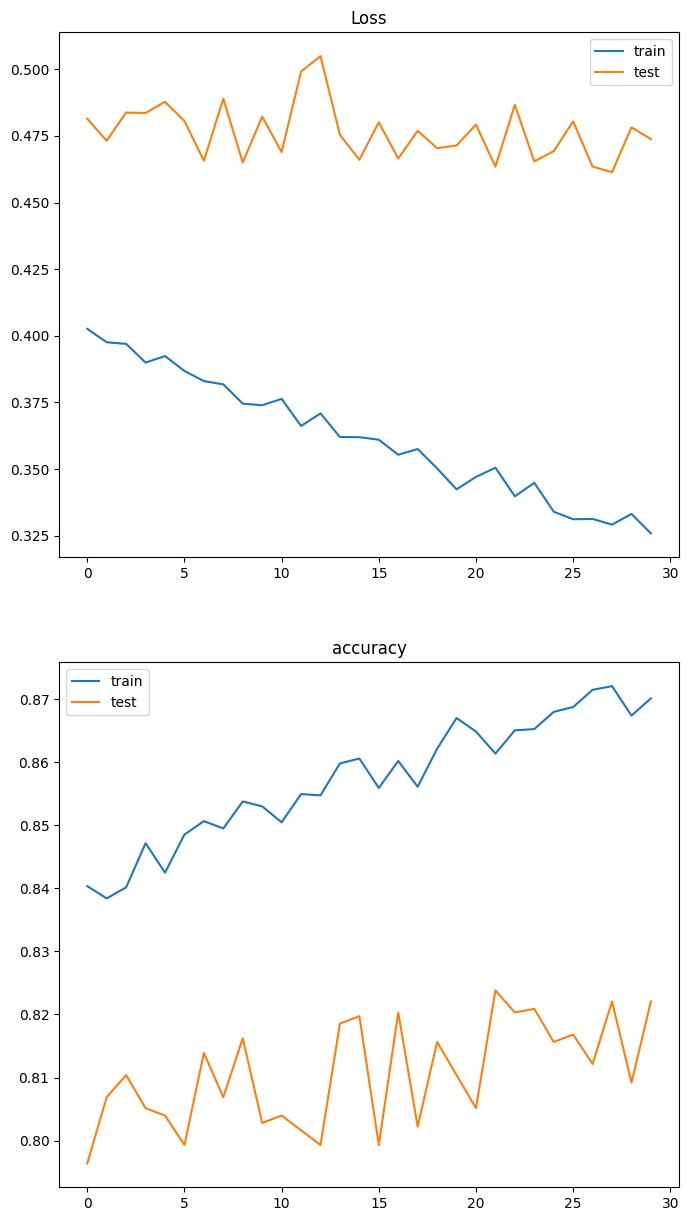

In [ ]:
# check model performance
plot_history(history, 'accuracy')

Training Scores
161/161 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87      2559
         1.0       0.86      0.90      0.88      2583

    accuracy                           0.87      5142
   macro avg       0.88      0.87      0.87      5142
weighted avg       0.88      0.87      0.87      5142



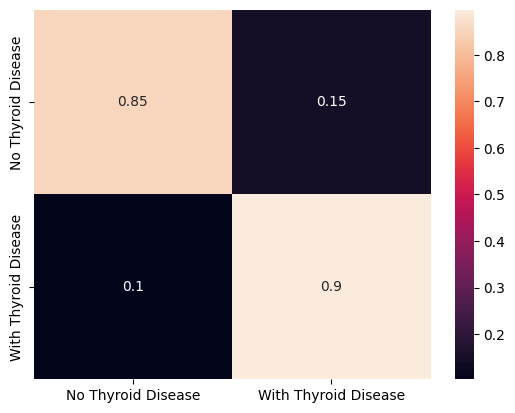



Testing Scores
54/54 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.83      0.81      0.82       869
         1.0       0.81      0.83      0.82       845

    accuracy                           0.82      1714
   macro avg       0.82      0.82      0.82      1714
weighted avg       0.82      0.82      0.82      1714



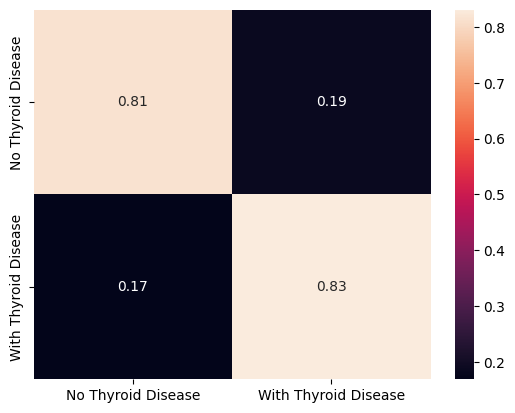

In [ ]:
# Make predicitons and evaluate your model
print('Training Scores')

# Define labels for the confusion matrix
labels = ['No Thyroid Disease', 'With Thyroid Disease']

# Get training predictions and round them to integers instead of floats
train_preds = np.rint(model.predict(X_train))

# Calculate the training accuracy score
seq1_train_accuracy = accuracy_score(y_train, train_preds)

# Classification Report
print(classification_report(y_train, train_preds))

# Confusion Matrix
conf_mat = confusion_matrix(y_train, train_preds, normalize='true')
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()
print('\n')
print('Testing Scores')

# Get testing predictions and round them to integers
test_preds = np.rint(model.predict(X_test))

# Calculate the test accuracy score
seq1_test_accuracy = accuracy_score(y_test, test_preds)

# Classification report
print(classification_report(y_test, test_preds))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, test_preds, normalize = 'true')
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()

The confusion matrix above shows  actual prediction scores of the SEQUENTIAL  model using two hidden layers. For training data, the model scored 85% true negative and  90% true positive equating to 87% accuracy. Model also scored 15% false negative and 10% false positive.

For testing data, the model scored 81% true negative and  83% true positive equating to 82% accuracy. Model also scored 19% false negative and 17% false positive.


##2. CREATE A 2ND NN MODEL

In [ ]:
# Sequential model
model2 = Sequential()
# First hidden layer
model2.add(Dense(29, # number of neurons
                input_dim = input_shape, # shape of  input features (number of columns)
                activation = 'relu'))
# Second hidden layer
model2.add(Dense(15, # number of neurons in second hidden layer
                activation = 'relu')) #  activation function
                # Output layer
# third hidden layer
model2.add(Dense(10, # number of neurons in 3rd hidden layer
                activation = 'relu')) #  activation function
                # Output layer
model2.add(Dense(1, activation = 'sigmoid'))

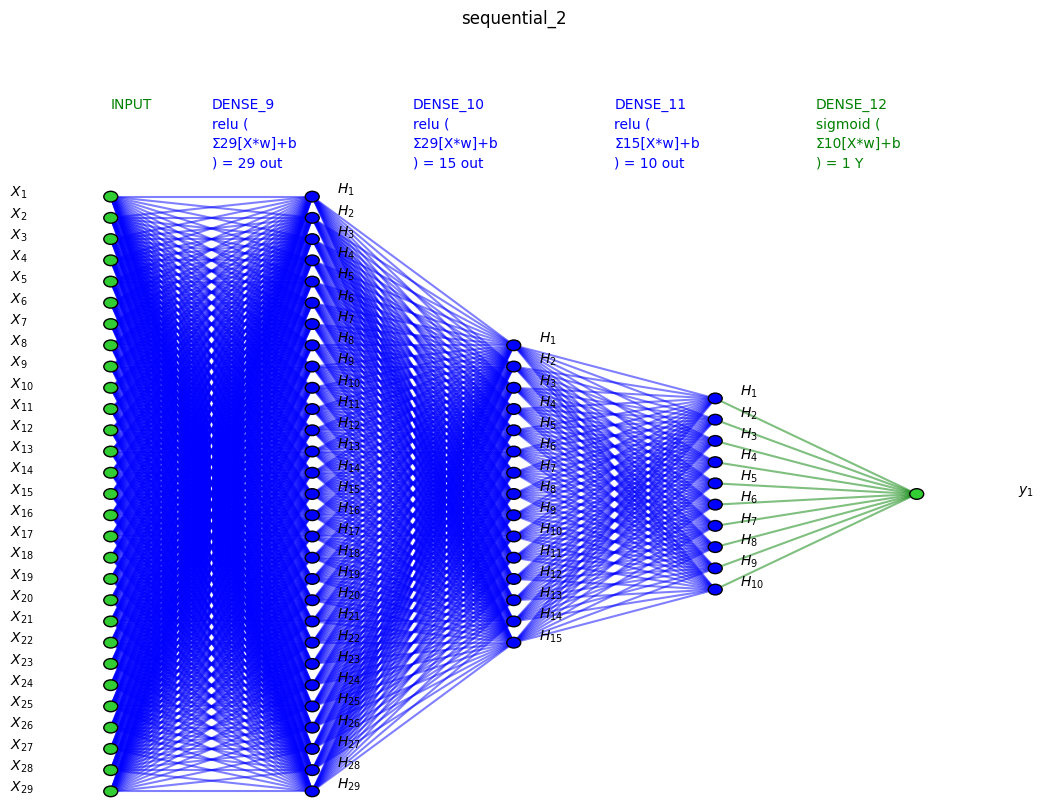

In [ ]:
visualize_nn(model2, description=True, figsize=(13,10))

In [ ]:
#Compile
model2.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
%%time
history = model2.fit(X_train, y_train, # Fit the  model
                    validation_data = (X_test, y_test), #took 53 secs
                    epochs=100)

Epoch 1/100
161/161 [==============================] - 2s 4ms/step - loss: 0.6826 - accuracy: 0.5552 - val_loss: 0.6651 - val_accuracy: 0.5980
Epoch 2/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6510 - accuracy: 0.6097 - val_loss: 0.6498 - val_accuracy: 0.6144
Epoch 3/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6293 - accuracy: 0.6330 - val_loss: 0.6242 - val_accuracy: 0.6412
Epoch 4/100
161/161 [==============================] - 1s 3ms/step - loss: 0.6084 - accuracy: 0.6649 - val_loss: 0.6083 - val_accuracy: 0.6721
Epoch 5/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5868 - accuracy: 0.6896 - val_loss: 0.5814 - val_accuracy: 0.7030
Epoch 6/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5672 - accuracy: 0.7058 - val_loss: 0.5655 - val_accuracy: 0.7205
Epoch 7/100
161/161 [==============================] - 1s 3ms/step - loss: 0.5493 - accuracy: 0.7242 - val_loss: 0.5477 - val_accuracy: 0.7299

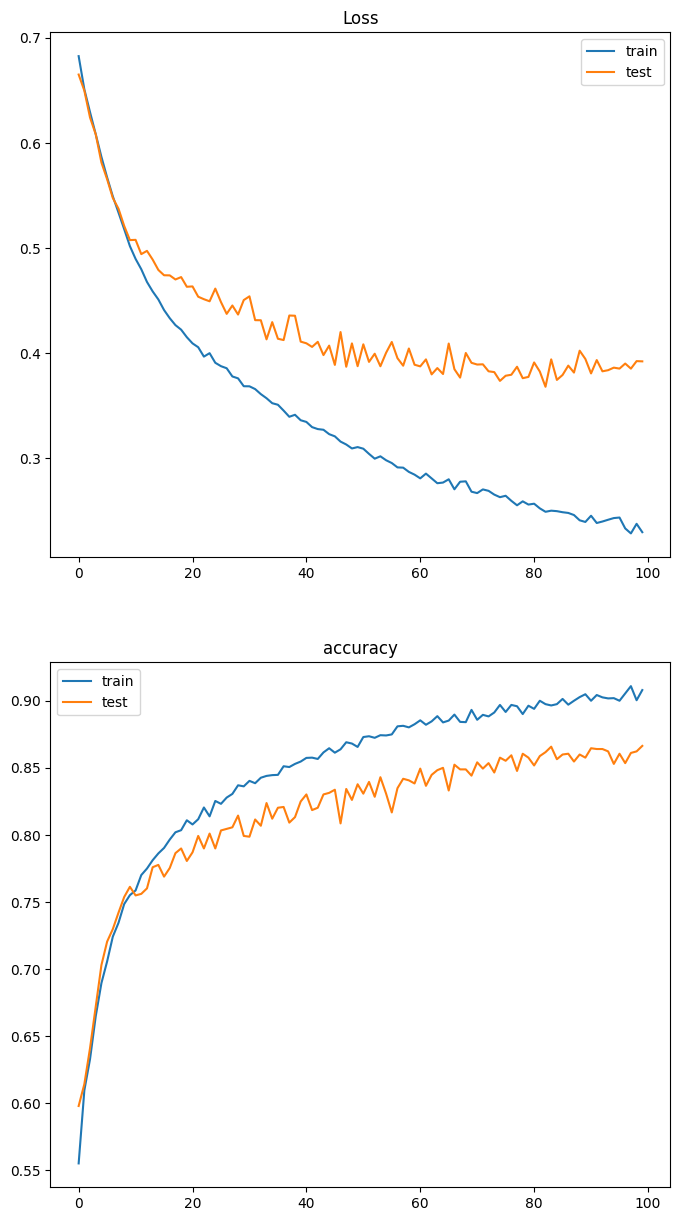

In [ ]:
# See how your model is doing
plot_history(history, 'accuracy')

Training Scores
161/161 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      2559
         1.0       0.96      0.87      0.91      2583

    accuracy                           0.92      5142
   macro avg       0.92      0.92      0.92      5142
weighted avg       0.92      0.92      0.92      5142



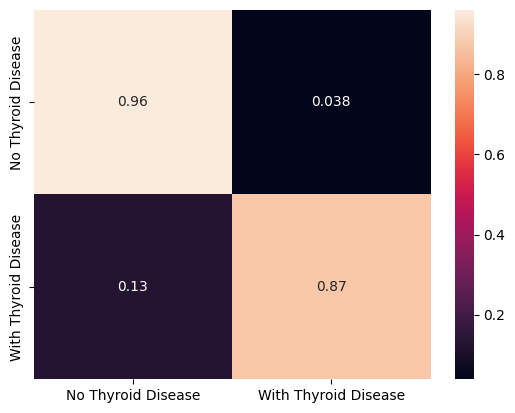



Testing Scores
54/54 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.88       869
         1.0       0.91      0.81      0.86       845

    accuracy                           0.87      1714
   macro avg       0.87      0.87      0.87      1714
weighted avg       0.87      0.87      0.87      1714



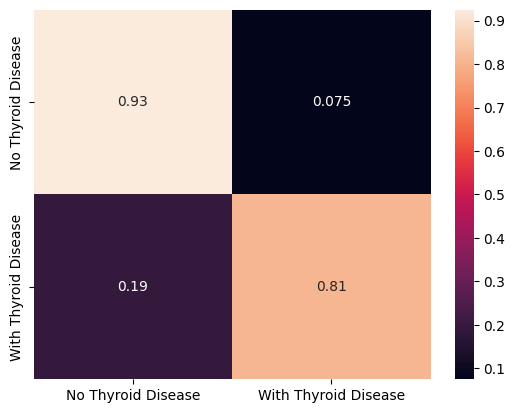

In [ ]:
# Make predicitons and evaluate your model
print('Training Scores')

# Define labels for the confusion matrix
labels = ['No Thyroid Disease', 'With Thyroid Disease']

# Get training predictions and round them to integers instead of floats
train_preds2 = np.rint(model2.predict(X_train))

#calculate training accuracy score
seq2_train_accuracy = accuracy_score(y_train, train_preds2)

# Classification Report
print(classification_report(y_train, train_preds2))

# Confusion Matrix
conf_mat = confusion_matrix(y_train, train_preds2, normalize='true')
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()
print('\n')
print('Testing Scores')

# Get testing predictions and round them to integers
test_preds2 = np.rint(model2.predict(X_test))

#calculate testing accuracy score
seq2_test_accuracy = accuracy_score(y_test, test_preds2)

# Classification report
print(classification_report(y_test, test_preds2))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, test_preds2, normalize='true')
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()

The confusion matrix above shows  actual prediction scores of the SEQUENTIAL  model using three hidden layers. For training data, the model scored 96% true negative and  87% true positive equating to 92% accuracy. Model also scored 3% false negative and 13% false positive.

For testing data, the model scored 93% true negative and  81% true positive equating to 87% accuracy. Model also scored 7% false negative and 19% false positive.


#Perform regularization technique of "Early Stopping"

In [ ]:
# Sequential model
model3 = Sequential()
# First hidden layer
model3.add(Dense(29, # number of neurons
                input_dim = input_shape, # shape of  input features (number of columns)
                activation = 'relu'))
# Second hidden layer
model3.add(Dense(15, # Hnumber of neurons in second hidden layer
                activation = 'relu')) #  activation function
                # Output layer
# third hidden layer
model3.add(Dense(10, # Hnumber of neurons in 3rd hidden layer
                activation = 'relu')) #  activation function
                # Output layer
model3.add(Dense(1, activation = 'sigmoid'))
#Compile
model3.compile(loss = 'bce', optimizer = 'adam', metrics=['accuracy'])


In [ ]:
%%time
history = model3.fit(X_train, y_train, # Fit the  model
                    validation_data = (X_test, y_test),
                    epochs=100,
                     callbacks=[EarlyStopping(patience=10)] #Early stopping regularization technique added
                     )

Epoch 1/100
161/161 [==============================] - 2s 4ms/step - loss: 0.6935 - accuracy: 0.5494 - val_loss: 0.6729 - val_accuracy: 0.5933
Epoch 2/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6596 - accuracy: 0.6074 - val_loss: 0.6479 - val_accuracy: 0.6225
Epoch 3/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.6344 - val_loss: 0.6218 - val_accuracy: 0.6499
Epoch 4/100
161/161 [==============================] - 0s 3ms/step - loss: 0.6053 - accuracy: 0.6673 - val_loss: 0.5933 - val_accuracy: 0.6844
Epoch 5/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5780 - accuracy: 0.6910 - val_loss: 0.5679 - val_accuracy: 0.7030
Epoch 6/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5541 - accuracy: 0.7147 - val_loss: 0.5514 - val_accuracy: 0.7089
Epoch 7/100
161/161 [==============================] - 0s 3ms/step - loss: 0.5294 - accuracy: 0.7343 - val_loss: 0.5345 - val_accuracy: 0.7270

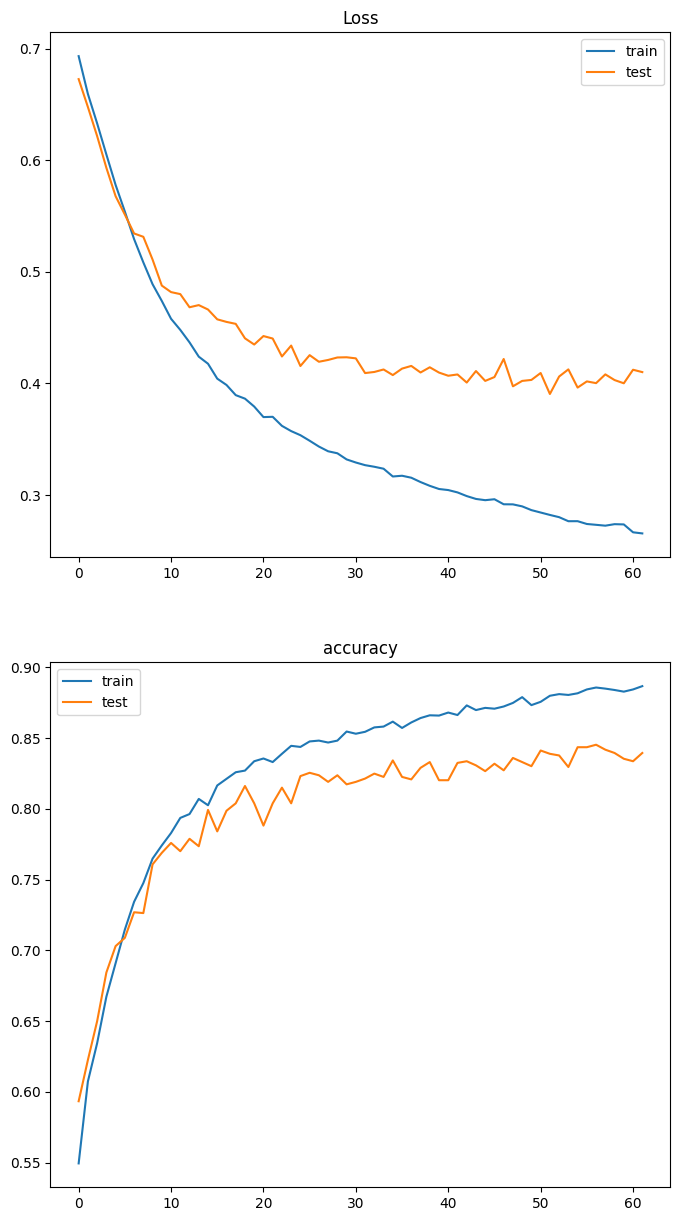

In [ ]:
# See how your model is doing
plot_history(history, 'accuracy')

Training Scores
161/161 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      2559
         1.0       0.92      0.85      0.89      2583

    accuracy                           0.89      5142
   macro avg       0.89      0.89      0.89      5142
weighted avg       0.89      0.89      0.89      5142



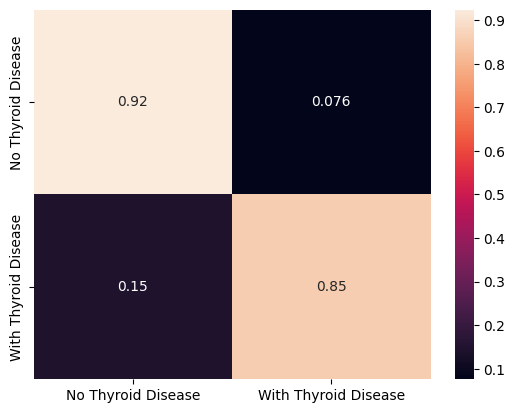



Testing Scores
54/54 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.85       869
         1.0       0.86      0.80      0.83       845

    accuracy                           0.84      1714
   macro avg       0.84      0.84      0.84      1714
weighted avg       0.84      0.84      0.84      1714



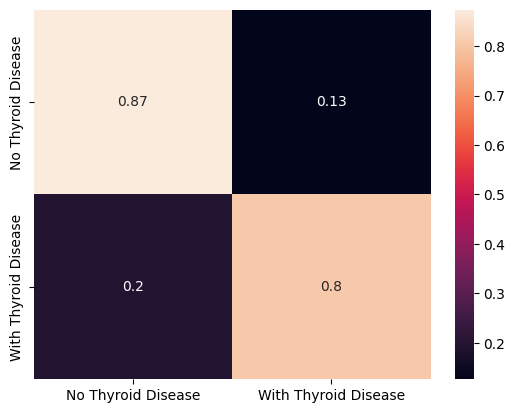

In [ ]:
# Make predicitons and evaluate your model
print('Training Scores')

# Define labels for the confusion matrix
labels = ['No Thyroid Disease', 'With Thyroid Disease']

# Get training predictions and round them to integers instead of floats
train_preds3 = np.rint(model3.predict(X_train))

#calculate training accuracy score
es_seq2_train_accuracy = accuracy_score(y_train, train_preds3)

# Classification Report
print(classification_report(y_train, train_preds3))

# Confusion Matrix
conf_mat = confusion_matrix(y_train, train_preds3, normalize='true')
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()
print('\n')
print('Testing Scores')

# Get testing predictions and round them to integers
test_preds3 = np.rint(model3.predict(X_test))

#calculate testing accuracy score
es_seq2_test_accuracy = accuracy_score(y_test, test_preds3)

# Classification report
print(classification_report(y_test, test_preds3))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, test_preds3, normalize='true')
heatmap(conf_mat, xticklabels=labels, yticklabels=labels, annot=True)
plt.show()

The confusion matrix above shows  actual prediction scores of the SEQUENTIAL  model using three hidden layers with regularization technique of early stopping. For training data, the model scored 92% true negative and  85% true positive equating to 89% accuracy. Model also scored 7% false negative and 15% false positive.

For testing data, the model scored 87 true negative and  80% true positive equating to 84% accuracy. Model also scored 13% false negative and 20% false positive.


In [ ]:
print('ML MODELS RESULTS SUMMARY AND COMPARISON')
print('\n')
print('DECISION TREE MODEL')
print(f'Training Score: {(dt_train_score):.4f}')
print(f'Testing Score: {(dt_test_score):.4f}')
print('\n')
print('DECISION TREE MODEL-TUNED')
print(f'Training Score: {(best_dt_train_score):.4f}')
print(f'Testing Score: {(best_dt_test_score):.4f}')
print('\n')
print('RANDOM FOREST MODEL')
print(f'Training Score: {(rf_train_score):.4f}')
print(f'Testing Score: {(rf_test_score):.4f}')
print('\n')
print('RANDOM FOREST MODEL-TUNED')
print(f'Training Score: {(best_rf_train_score):.4f}')
print(f'Testing Score: {(best_rf_test_score):.4f}')
print('\n')
print('KNN MODEL-WITH PCA')
print(f'Training Score: {(pca_train_score):.4f}')
print(f'Testing Score: {(pca_test_score):.4f}')
print('\n')
print('KNN MODEL-WITHOUT PCA')
print(f'Training Score: {(no_pca_train_score):.4f}')
print(f'Testing Score: {(no_pca_test_score):.4f}')
print('\n')
print('SEQUENTIAL MODEL-2 LAYERS')
print(f'Training Score: {(seq1_train_accuracy):.4f}')
print(f'Testing Score: {(seq1_test_accuracy):.4f}')
print('\n')
print('SEQUENTIAL MODEL-3 LAYERS')
print(f'Training Score: {(seq2_train_accuracy):.4f}')
print(f'Testing Score: {(seq2_test_accuracy):.4f}')
print('\n')
print('SEQUENTIAL MODEL-3 LAYERS-WITH EARLY STOPPING')
print(f'Training Score: {(es_seq2_train_accuracy):.4f}')
print(f'Testing Score: {(es_seq2_test_accuracy):.4f}')


#Show the training and testing scores for ALL models

ML MODELS RESULTS SUMMARY AND COMPARISON


DECISION TREE MODEL
Training Score: 1.0000
Testing Score: 0.8191


DECISION TREE MODEL-TUNED
Training Score: 0.9716
Testing Score: 0.8203


RANDOM FOREST MODEL
Training Score: 1.0000
Testing Score: 0.9195


RANDOM FOREST MODEL-TUNED
Training Score: 0.9893
Testing Score: 0.9125


KNN MODEL-WITH PCA
Training Score: 0.8802
Testing Score: 0.8250


KNN MODEL-WITHOUT PCA
Training Score: 0.8868
Testing Score: 0.8302


SEQUENTIAL MODEL-2 LAYERS
Training Score: 0.8746
Testing Score: 0.8221


SEQUENTIAL MODEL-3 LAYERS
Training Score: 0.9166
Testing Score: 0.8664


SEQUENTIAL MODEL-3 LAYERS-WITH EARLY STOPPING
Training Score: 0.8893
Testing Score: 0.8396


##SUMMARY

In this analysis, we evaluated several machine learning models for predicting thyroid disease, assessing their training and testing performances. The models included Decision Trees, Random Forests, K-Nearest Neighbors (KNN) with and without Principal Component Analysis (PCA), and Sequential Neural Network models with different layer configurations, including one with early stopping.

The Random Forest Model and its tuned version achieved the highest testing scores of 0.9195 and 0.9125, respectively. These models demonstrated strong predictive capabilities and performed well on unseen data, indicating good generalization. However, they also achieved perfect training scores, suggesting potential overfitting.

The Decision Tree models showed slightly lower testing scores compared to the Random Forest models, but they exhibited better generalization, especially the tuned version.

The KNN models provided moderate performance, with the KNN model without PCA achieving a slightly higher testing score (0.8302) compared to the one with PCA (0.8250).

The Sequential Neural Network models had varying results, with the 3-layer Sequential Model achieving the best testing score (0.8664).

Overall, the Random Forest Model and its tuned version appear to be the top-performing models, providing a good balance between accuracy and generalization.

##CONCLUSION

Considering the importance of accurate and reliable predictions in healthcare applications, it is crucial to select models that balance performance, interpretability, and risk of overfitting. Selecting the best model for predicting thyroid disease should take into account various factors, including accuracy, interpretability, computational resources, and the specific requirements of the application.

Regular evaluation and validation of the chosen model on independent datasets are essential to ensure its effectiveness and practicality for real-world applications. Further fine-tuning and exploration of other reqularization techniques could potentially enhance model performance and overall reliability in thyroid disease prediction.

##RECOMMENDATION

Combining the strengths of different machine learning models and continually refining the model's performance can lead to accurate and robust thyroid disease prediction. In order to achieve this, additional steps must be taken including DATA COLLECTION and REAL WORLD TESTING.

Regular updates and additional relevant data can help keep the model up-to-date and ensure its continued effectiveness in predicting thyroid disease. We must ensure a comprehensive and high-quality dataset for training and evaluation.

After finalizing the model, conduct real-world testing on independent datasets or integrate it into a healthcare setting for further validation. Regular performance monitoring and updates based on real-world feedback will help maintain the model's effectiveness over time.